# Projeto Final - Inteligência Artificial

### Definição das bibliotecas utilizadas

In [60]:
# Tríade de bibliotecas de ciência de dados
import torch
from torch import nn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

# Modelos
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Funções úteis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

Leitura da base de dados

In [61]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.shape)
display(df.head())

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Pt1. Etapa de pré-processamento dos dados

Entendo a natureza dos dados

In [62]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']
[]


Busca Por Dados Faltantes

In [63]:
## TODO
dados_faltantes_total = 0

for col in df.columns:
  dados_faltantes = df[col].isna().sum()
  dados_faltantes_total += dados_faltantes

  if (dados_faltantes > 0):
    porcentagem_local = len(df[col])/dados_faltantes


porcetagem_total = dados_faltantes_total/df.shape[0]
print('Total dados faltantes: {:.2f}%'.format(porcetagem_total) )

Total dados faltantes: 0.00%


Tratamento de dados irregulares e incosistentes nas colunas

In [64]:

i = 0
for col in df.columns:
  num_line_total = len(df[col])
  freq = df[col].value_counts()
  frq_relativa = freq / len(df[col])

  for fr in frq_relativa:
    if fr > 0.95:
      df.drop(columns=[col])

Tratamento de linhas iguais

In [65]:
line = []

for lineComp in df.index:
    linhaSelectComp = df.iloc[lineComp]
    if(linhaSelectComp[0] in line):
        df = df.drop[lineComp]
        line.append(linhaSelectComp[0])        

Tratamento de outliers nos dados

c:\Users\smili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


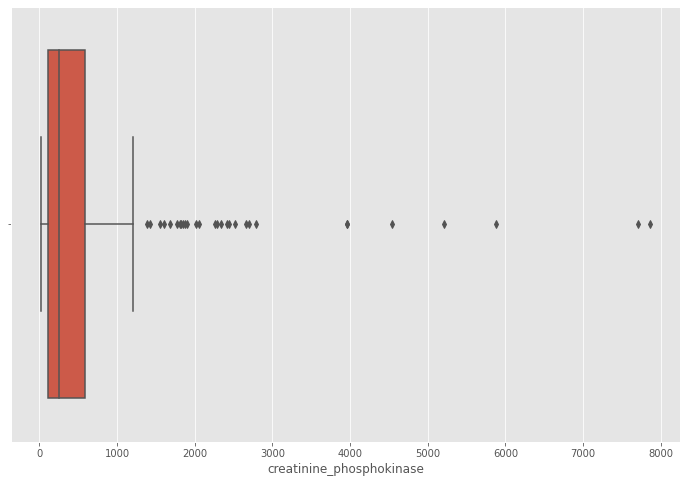

In [66]:
outliers = []

sns.boxplot(df["creatinine_phosphokinase"])
outlier = np.where(df['creatinine_phosphokinase']>1200)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)

c:\Users\smili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


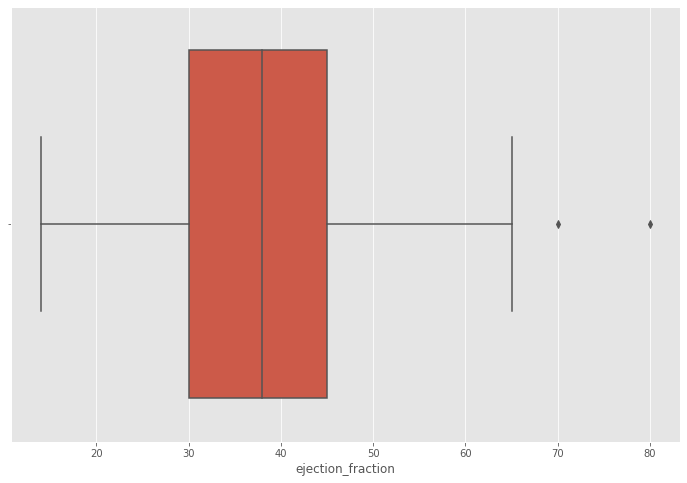

In [67]:

sns.boxplot(df["ejection_fraction"])
outlier = np.where(df['ejection_fraction']>65)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)

c:\Users\smili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


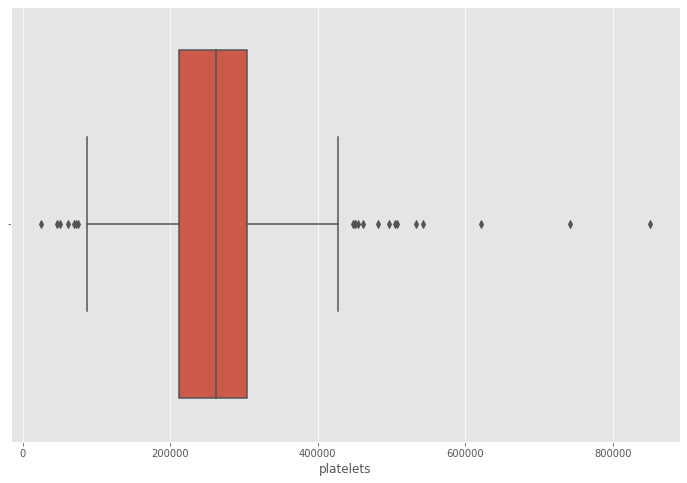

In [68]:
sns.boxplot(df["platelets"])
outlier = np.where(df['platelets']>420000)
outlier2 = np.where(df['platelets']<100000)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)
        
for i in range(len(outlier2[0])):
    if(not(i in outliers)):
        outliers.append(i)


c:\Users\smili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


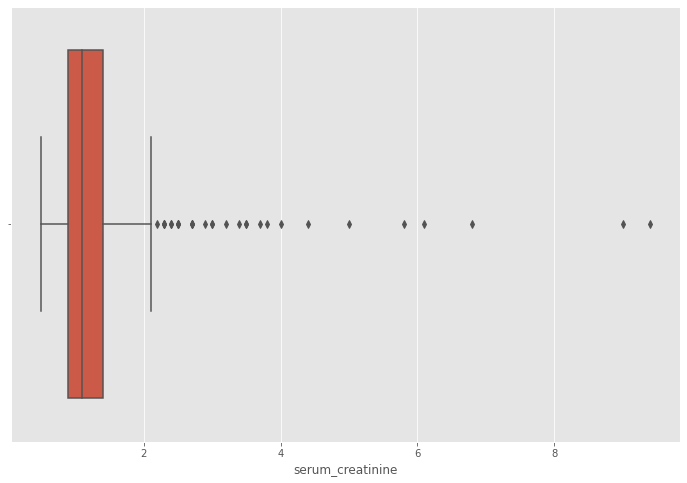

In [69]:
sns.boxplot(df["serum_creatinine"])
outlier = np.where(df['serum_creatinine']>2.2)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)

c:\Users\smili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


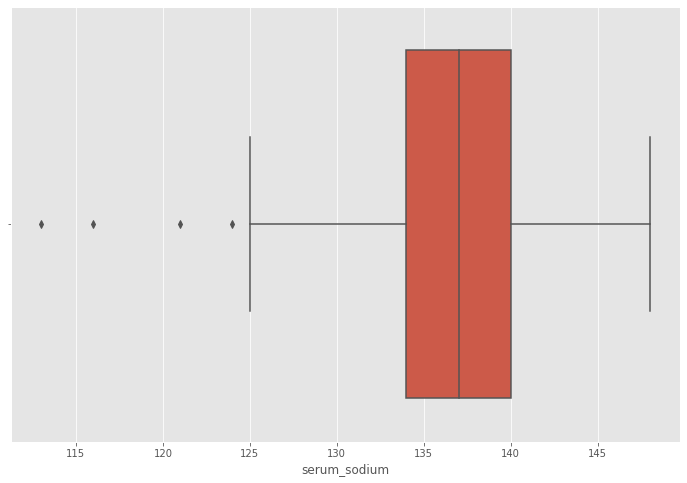

In [70]:
sns.boxplot(df["serum_sodium"])
outlier = np.where(df['serum_sodium']<125)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)
        

Remover outliers

In [71]:
df = df.drop(outliers)

Carregamento dos dados

In [72]:
# Selecionando as dimensões de idade e batimentos máximos
X = df.drop("DEATH_EVENT", axis=1).to_numpy()
y = df["DEATH_EVENT"]

## TODO separe em treino e teste
# ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## TODO normalize os dados

# ...

sc = StandardScaler()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform (X_test)

Visualização Básica dos dados de Teste e Treino

Text(0.5, 1.0, 'Rótulos Teste')

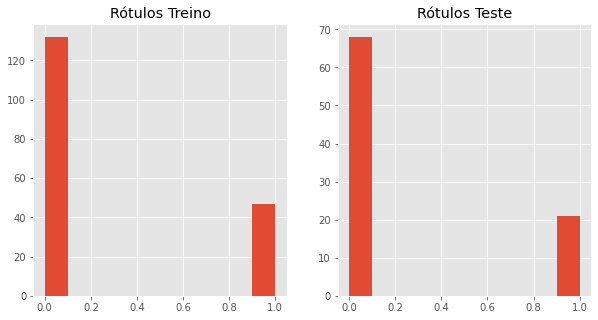

In [73]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(y_train)
axs[0].set_title('Rótulos Treino')
axs[1].hist(y_test)
axs[1].set_title('Rótulos Teste')

### Pt.2 Classificação dos Dados

Separação dos dados de treino e de teste juntamente com a seleção dos atributos que desejamos sendo selecionados 'ejection-fraction' e 'serum_creatinine'
>A seleção dos atributos se deu por meio de pesquisa, testes e opiniões de profissionais da saúde

(179, 2) (179,)


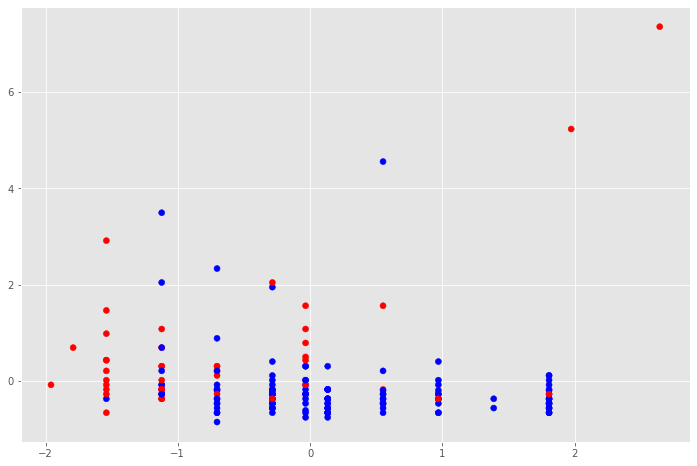

In [74]:
## TODO Selecione as dimensões de idade e batimentos máximos (só descomentar se Xtrain e ytrain já foram definidos)
X2d = X_train[:, [4, 7]]
y2d = y_train
#print(Xtrain[0])
# print(X2d)
# print(y2d)

## TODO Visualize a distribuição (só descomentar)
plt.scatter(X2d[:, 0], X2d[:, 1], c=y2d, cmap='bwr')
print(X2d.shape, y2d.shape)

## TODO Separar os dados (X2d, y2d) em treino e validação (X2d_train, X2d_val, y2d_train, y2d_val)
X2d_train, X2d_val, y2d_train, y2d_val = train_test_split(X2d, y2d, test_size = 0.50, random_state = 42)

In [75]:
def plot_boundary(Xtr, Xts, ytr, yts, clf, clf_name='SVM'):
  
  x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
  y_min, y_max = Xtr[:, 0].min() - 1, Xtr[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  y_predict = clf.predict(Xtr)
  acc_train = classification_report(ytr, y_predict, output_dict=True)['accuracy']
  y_predict = clf.predict(Xts)
  acc_test = classification_report(yts, y_predict, output_dict=True)['accuracy']

  Z = Z.reshape(xx.shape)
  fig, ax = plt.subplots(1, 1, figsize=(7, 5))
  ax.pcolormesh(xx, yy, Z, alpha=0.1, cmap='bwr')
  ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, alpha=0.25, cmap='bwr', label='Treino')
  ax.scatter(Xts[:, 0], Xts[:, 1], c=yts, marker='v', edgecolors='k', s=60, cmap='bwr', label='Teste')
  
  ## TODO organize o título da figura com o score do estimador clf (parâmetro)
  plt.title(f'{clf_name} {acc_train:.3f}/{acc_test:.3f}')
  
  plt.legend()
  plt.show()

Visualização dos métodos de classificação - Regressão Linear

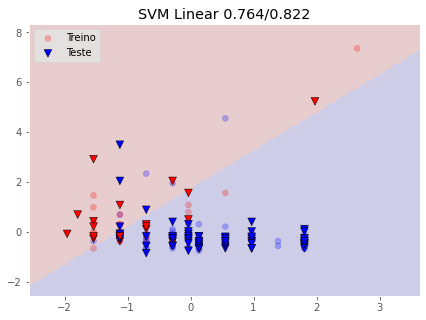

In [76]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVM Linear')

Visualização dos métodos de classificação - Regressão Polinomial
> Melhor método encontrado em nossa análise

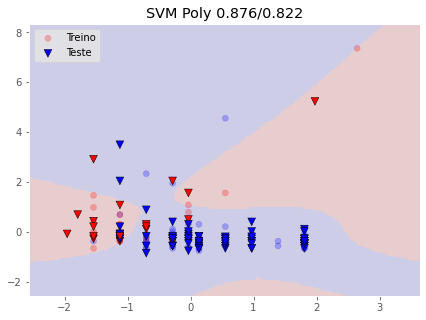

In [77]:
clf = svm.SVC(kernel='poly', C=2, coef0=.5, degree=5)
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVM Poly')

Visualização dos métodos de classificação - RBF

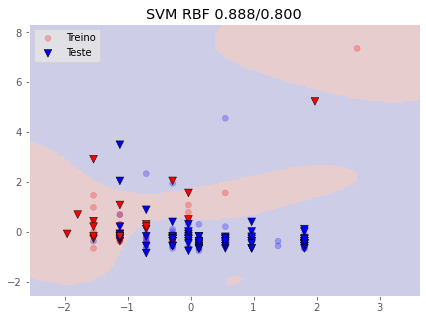

In [78]:
clf = svm.SVC(kernel='rbf', C=10, gamma='auto')
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVM RBF')

Visualização dos métodos de classificação - Árvore de Decisão

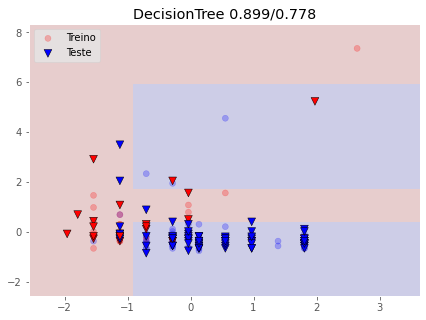

In [79]:
clf = DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.005)
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'DecisionTree')

Visualização dos métodos de classificação - Regressão Logistica

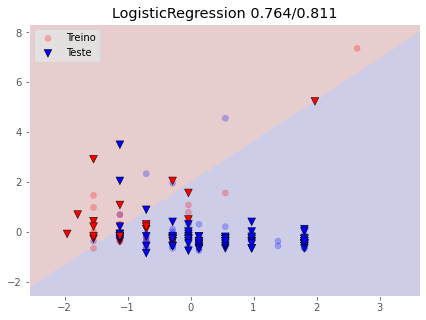

In [80]:
clf = LogisticRegression(C=.5)
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'LogisticRegression')

Visualização dos métodos de classificação - KNN

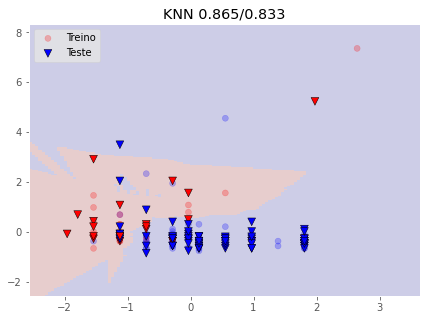

In [81]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'KNN')

Observação - Dentre os métodos de classificação analisados acima, o melhor encontrado após nossa análise foi o de Regressão polinomial, por nao apresentar overfit e nem underfit, ou seja, com o menor bias e variance encontrado por nós após a inspeção

### Pt.3 Otimização de Hiperparâmetros

Seleção dos melhores hiperparâmetros específicos para nossa base de dados

In [82]:
espaco_hiperparametros = {
    'C' : [.1, .5, 1, 2, 5, 10],
    'coef0' : [0, .5, 1, 5, 10],
    'degree': [1, 2, 3, 4, 5]
}
model = svm.SVC(kernel='poly')
rand_search = RandomizedSearchCV(model, espaco_hiperparametros, n_iter=45, cv=5)
search = rand_search.fit(X2d_train, y2d_train)
rand_search.best_params_

{'degree': 2, 'coef0': 5, 'C': 0.5}

Retreino dos modelos com os hiperparâmetros estabelecidos

In [83]:
best_svm_model = svm.SVC(kernel='poly', C=2, coef0=.5, degree=5)
best_svm_model.fit(X2d_train, y2d_train)
y_predict = best_svm_model.predict(X2d_val)
print(classification_report(y_predict, y2d_val))
print(confusion_matrix(y_predict, y2d_val))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        72
           1       0.55      0.67      0.60        18

    accuracy                           0.82        90
   macro avg       0.73      0.76      0.74        90
weighted avg       0.84      0.82      0.83        90

[[62 10]
 [ 6 12]]


Plot do gráfico após a otimização dos hiperparâmetros

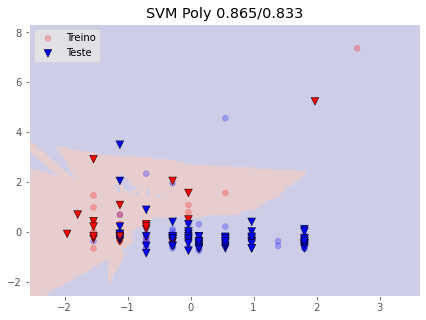

In [84]:
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVM Poly')